# Assignment 1

Category 4 and Category 5 hurricane data analysis

In [51]:
# Loading required Libraries
library(xml2)
library(rvest)
library(dplyr)
library(ggplot2)
library(ggfortify)
library(dplyr)


**Step1:** Connect to the Wikipedia pages and download the data for Category 4 and 5 hurricanes.

In [52]:
category4_url <- 'https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes'
category5_url <- 'https://en.wikipedia.org/wiki/List_of_Category_5_Atlantic_hurricanes'

cat4_dump <- category4_url %>% 
  read_html %>%
  html_nodes("table")
# print(cat4_dump)

cat5_dump <- category5_url %>% 
  read_html %>%
  html_nodes("table")
# print(cat5_dump)

**Step2:** Filter out the data into variables on which we can operate

In [53]:
# peryear frequecy
cat4_freq <- html_table(cat4_dump[1], fill=T)[[1]]
# Individual hurricane data
cat4_data_arr = list()
for (table in 2:6){
    cat4_data_arr[[table-1]] <- html_table(cat4_dump[table], fill=T)[[1]]
}
# Monthly distribution
cat4_month_data <- html_table(cat4_dump[8], fill=T)[[1]]
# print(cat4_data[[1]])
# print(cat4_month_data)[[1]]

cat5_data <- html_table(cat5_dump[2])[[1]]
# head(cat5_data)

The data has been saved into 3 variables, cat4_hurricane, cat4_data(list with all the previous decades data) and cat5_data

**Step2 :** Now, we need to truncate the headers and footers in order to get the cleaned up data.
Merge all the data from category for into single list

In [54]:
# Category 4 
# The first row is the table header and last one is the footer, we need to truncate these two from the data 
for (i in 1:4){
    n_row <- dim(cat4_data_arr[[i]])[1]
    cat4_data_arr[[i]] <- cat4_data_arr[[i]][3: n_row-1, ][c(1,2,3,4,7)]
    names(cat4_data_arr[[i]]) <- c("name", "year", "month", "max_sustained_winds", "min_pressure")
}
cat4_data_arr[[5]] <- cat4_data_arr[[5]][2: n_row-1, ][c(1,3,4,5,6)]
names(cat4_data_arr[[5]]) <- c("name", "year", "month", "max_sustained_winds", "min_pressure")

# Merging all the data for category 4 hurricanes into a single table
cat4_data <- cat4_data_arr[[1]]
for (i in 2:5){
    cat4_data <- rbind(cat4_data, cat4_data_arr[[i]])
}

# For month pairs, pick the first one. Also from dates, just pick the month
cat4_data$month <- gsub("([A-Za-z]+).*", "\\1", cat4_data$month)
# Take only values for pressure and remove the units
cat4_data$min_pressure <- gsub("(.. )?([0-9]+).*", "\\2", cat4_data$min_pressure)
# convert year to number
cat4_data$year <- as.numeric(cat4_data$year)


### Category 4 month data ####
names(cat4_month_data) <- c("month", "n")

In [55]:
# Category 5
n_row = dim(cat5_data)[1]
cat5_data <- cat5_data[1: n_row-1, 1:7]
names(cat5_data) <- c("name", "date", "duration_in_hrs", "max_sustained_winds", "min_pressure", "affected_areas", "deaths")

#calculating parameters
cat5_data$month <- gsub("([A-Za-z]+).*", "\\1", cat5_data$date)
# convert year to number
cat5_data$year <- as.numeric(gsub("(.*, )?([0-9]+).*", "\\2", cat5_data$date))
# Take only values for windspeed and pressure and remove the units
cat5_data$max_sustained_winds <- gsub("([0-9]+).*", "\\1", cat5_data$max_sustained_winds)
cat5_data$min_pressure <- gsub("([0-9]+).*", "\\1", cat5_data$min_pressure)

# glimpse(cat5_data)

**Step3**: Lets get the hurricane count count for every 5 years and also by month.

Warning message:
“Removed 106 rows containing missing values (position_stack).”Warning message:
“Removed 106 rows containing missing values (geom_text).”

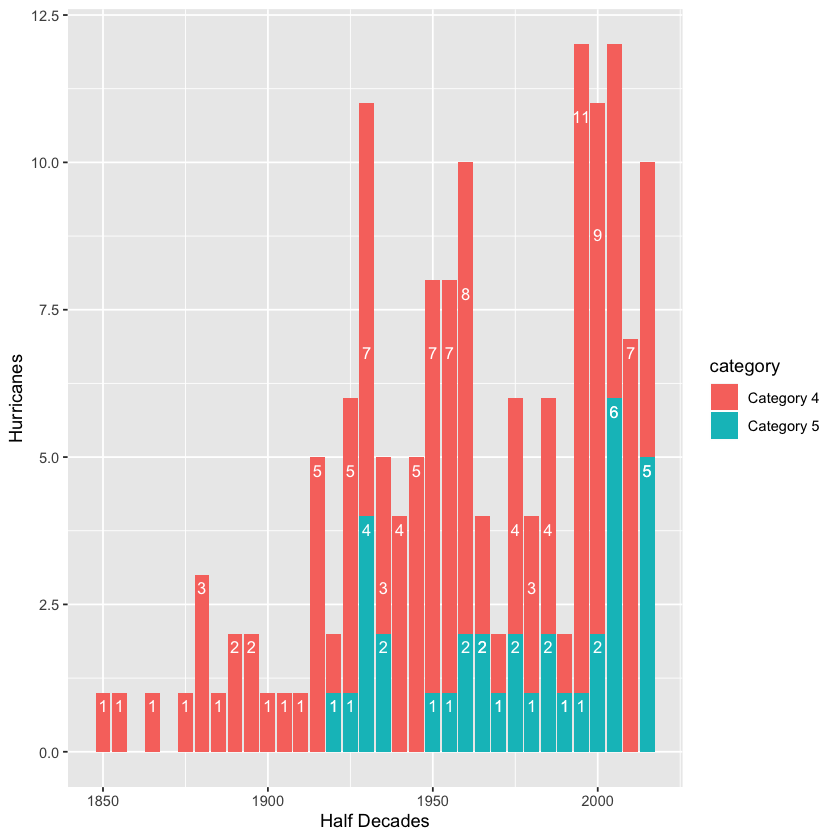

In [56]:
cat4_data$half_decade <- cat4_data$year - (cat4_data$year %% 5)
count4 <- group_by(cat4_data, half_decade)
count4 <- count(count4, n())[order(count4$half_decade), ]
count4$label <- "Category 4"
# head(count4)

cat5_data$half_decade <- cat5_data$year - (cat5_data$year %% 5)
count5 <- group_by(cat5_data, half_decade)
count5 <- count(count5, n())[order(count5$half_decade), ]
count5$label <- "Category 5"
# head(count5)

plot_data <- data.frame(category=c(count5$label, count4$label),
                n=c(count5$n, count4$n),
                half_decade=c(count5$half_decade, count4$half_decade))

# plot_data <- plot_data[order(plot_data$category), ]
# plot_data
plot <- ggplot(data=plot_data, aes(x=half_decade, y=n, fill=category )) +
    xlab("Half Decades") +
    ylab("Hurricanes") +    
    geom_bar(stat="identity") + 
    geom_text(aes(label=n), vjust=1.6, color="white", size=3.5)
plot


Warning message:
“Unknown or uninitialised column: 'month'.”

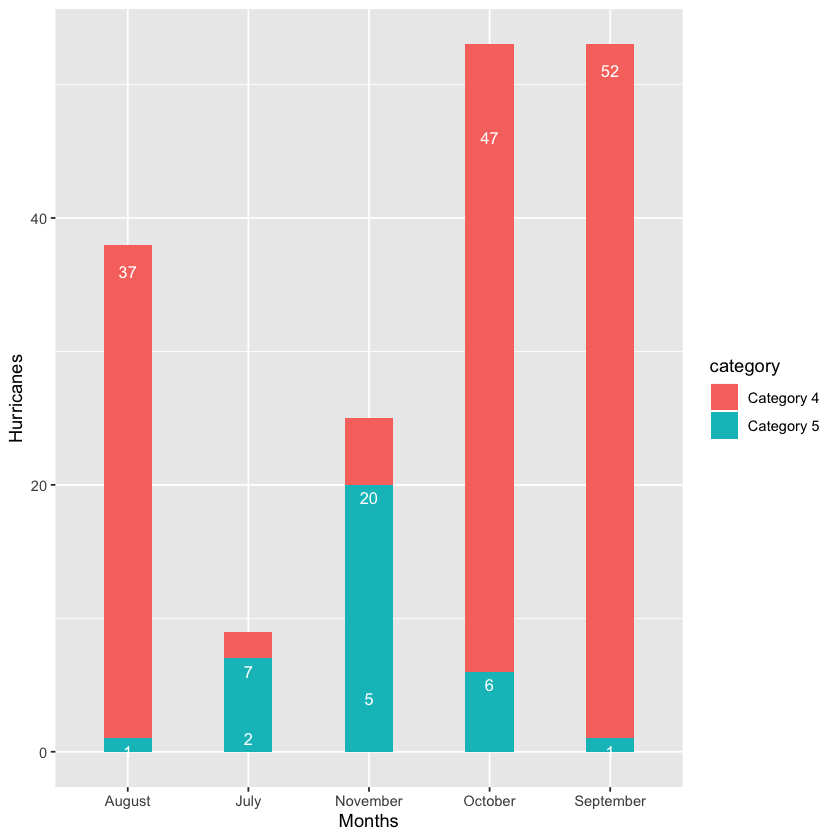

In [57]:
### By Month ###
cat5_month_data <- group_by(cat5_data, cat5_data$month)
cat5_month_data <- count(cat5_month_data, n())
cat5_month_data$label <- "Category 5"

cat4_month_data$label <- "Category 4"

plot_data <- data.frame(category=c(cat5_month_data$label, cat4_month_data$label),
                n=c(cat5_month_data$n, cat4_month_data$n),
                month=c(cat5_month_data$month, cat4_month_data$month))

plot <- ggplot(data=plot_data[order(factor(plot_data$month, levels=month.name)), ], aes(x=month, y=n, fill=category)) +
    xlab("Months") +
    ylab("Hurricanes") +
    geom_bar(stat="identity", width=0.4) + 
    geom_text(aes(label=n), vjust=1.6, color="white", size=3.5)
plot

## Observed Trends
- The frequency of hurricanes has been continously increasing. We can clearly see that there used to be just 1 occurence of a hurricane every 5 years around 1850. But since year 2000, an avergae of 5 hurricanes are occuring every half decade.
- The maximum hurricane strikes occur during the fall time of the ye: August - October


**Step4:** Let's first calculate mean and variance of this data

In [58]:
cat4_mean = mean(na.omit(count4$n))
cat4_variance = var(na.omit(count4$n))
sprintf("Mean for category 4 data: %f", cat4_mean)
sprintf("Variance for category 4 data: %f", cat4_variance)

cat5_mean = mean(na.omit(count5$n))
cat5_variance = var(na.omit(count5$n))
sprintf("Mean for category 5 data: %f", cat5_mean)
sprintf("Variance for category 5 data: %f", cat5_variance)


[1] "Mean for category 4 data: 3.750000"

[1] "Variance for category 4 data: 7.935484"

[1] "Mean for category 5 data: 2.058824"

[1] "Variance for category 5 data: 2.308824"

## Posisson Distribution
Probability distribution for Poisson is modelled as $P(X,\lambda)$ with, 
X = x is the number of events, $\lambda$ is the mean of events calculated from the historical data
        $$P(X = x, \lambda) = \frac{\lambda^x}{x!} e^{-\lambda}$$

- The Posisson distribution is used for modelling of rare events like accidents and in this case, a hurricane strike.
- $\lambda$ is calculated from the category4 and category5 hurricane means, calculated above

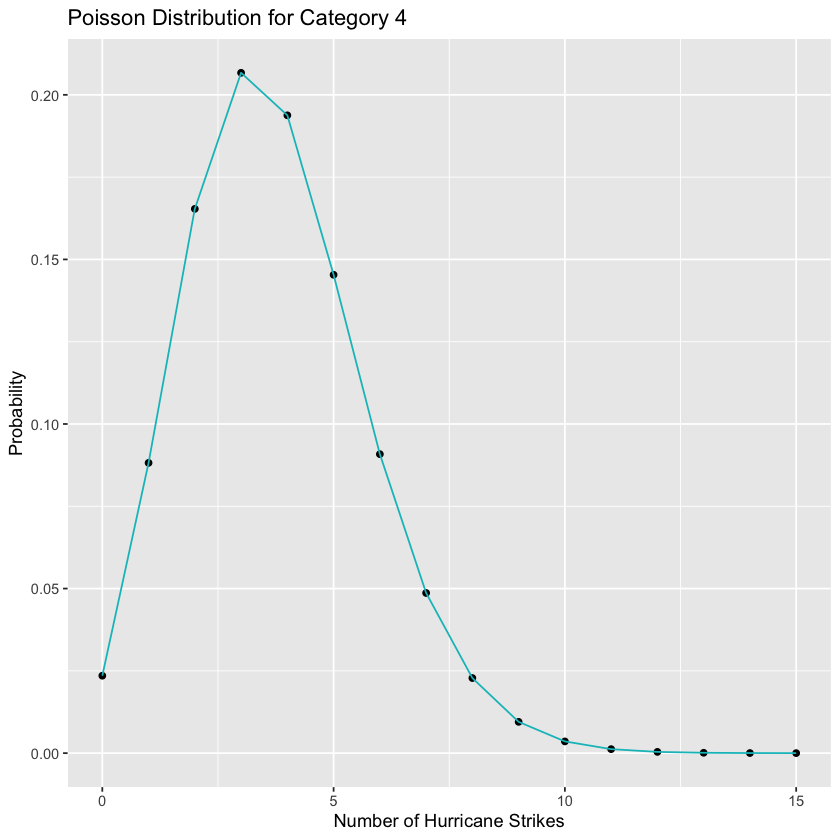

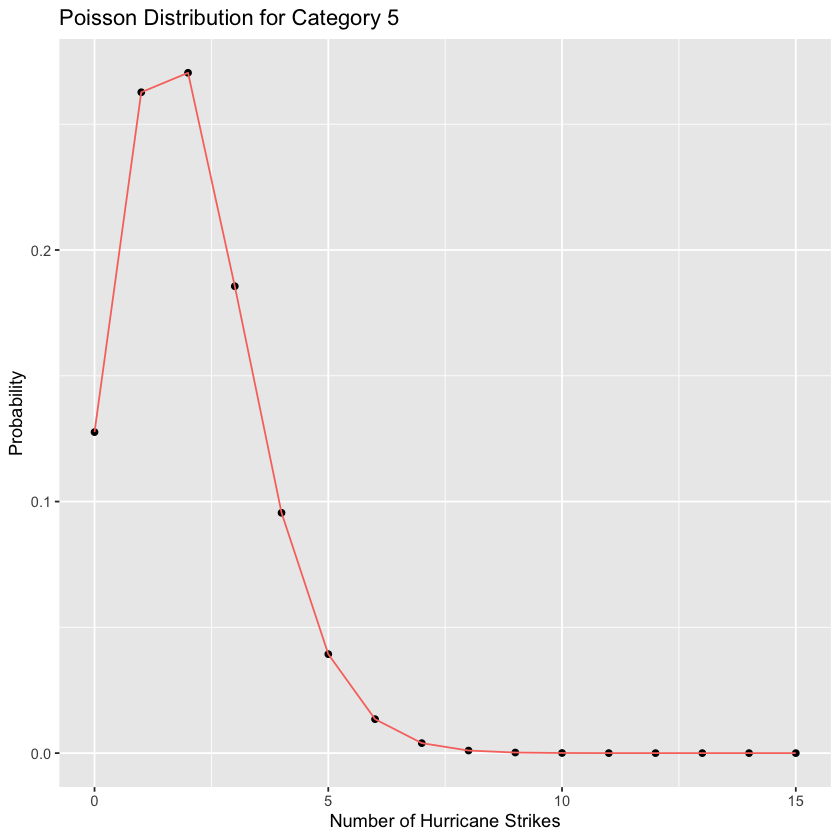

In [59]:
x=c(0:15)
pois_args = list(lambda=cat4_mean)
plot <- ggplot(data.frame(x), aes(x)) + 
    ggtitle("Poisson Distribution for Category 4 ") +
    xlab("Number of Hurricane Strikes") +
    ylab("Probability") +
    stat_function(geom="point", n=length(x), fun=dpois, args=pois_args ) +
    stat_function(geom="line", n=length(x), fun=dpois, args=pois_args, color="#00BFC4")
plot

x=c(0:15)
pois_args = list(lambda=cat5_mean)
plot <- ggplot(data.frame(x), aes(x)) +
    ggtitle("Poisson Distribution for Category 5 ") +
    xlab("Number of Hurricane Strikes") +
    ylab("Probability") +
    stat_function(geom="point", n=length(x), fun=dpois, args=pois_args ) +
    stat_function(geom="line", n=length(x), fun=dpois, args=pois_args, color="#F8766D")
plot

# Combined Distribution

Since, we are interested in calculating the probability of a hurricane strike, Lets get the total probability of a hurricane strike given that the hurricane is greater than Category 4

[1] "Mean Hurricane Strikes every 5 years: 4.843750"

[1] "Variance for Hurricane Strikes every 5 years: 13.684476"

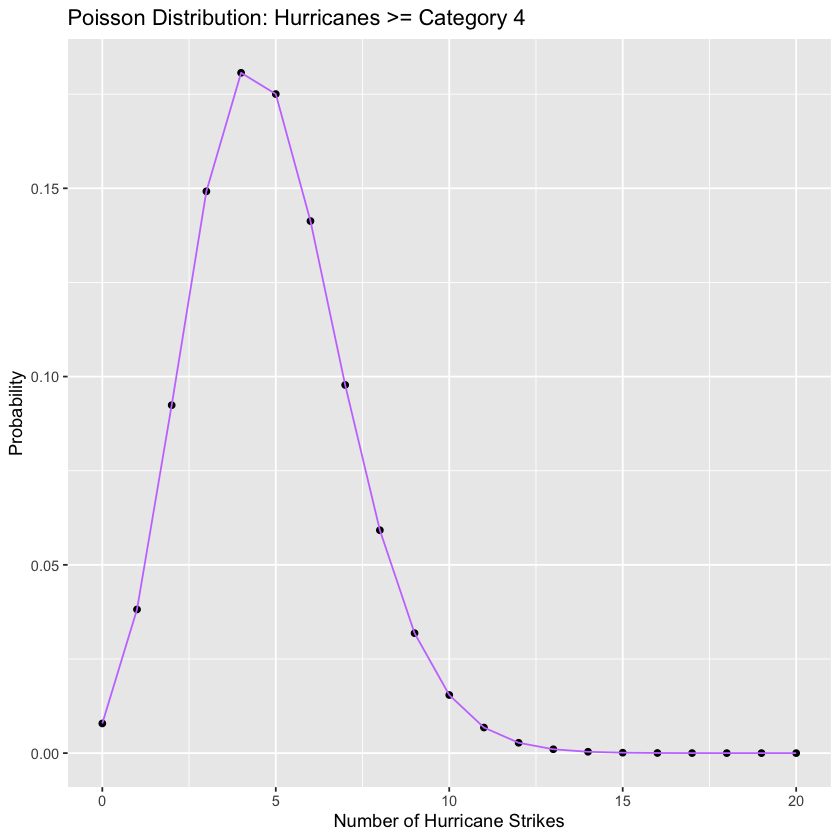

In [60]:
total_data = rbind(cat4_data[c("name","half_decade")], cat5_data[c("name","half_decade")])
total_data <- group_by(total_data, half_decade)
total_data <- count(total_data, n())[order(count5$half_decade), ]

tot_mean = mean(na.omit(total_data$n))
tot_variance = var(na.omit(total_data$n))

sprintf("Mean Hurricane Strikes every 5 years: %f", tot_mean)
sprintf("Variance for Hurricane Strikes every 5 years: %f", tot_variance)

x=c(0:20)
pois_args = list(lambda=tot_mean)
plot <- ggplot(data.frame(x), aes(x)) + 
    ggtitle("Poisson Distribution: Hurricanes >= Category 4 ") +
    xlab("Number of Hurricane Strikes") +
    ylab("Probability") +
    stat_function(geom="point", n=length(x), fun=dpois, args=pois_args ) +
    stat_function(geom="line", n=length(x), fun=dpois, args=pois_args, color="#C77CFF")
plot


**NOTE**: There is a problem here, for Poisson, mean = variance = $\lambda$. But, in our case mean is coming out to be 4.78 and variance as 13.14. 
Now, We'll use the Q-Q plot to show that the data actually does not properly fit the Poisson Distribution

In [61]:
myqqplot<-function(x,dist, binom.n=3){ 
    n1<-length(x)
    p1<-c(1:n1)/(n1+1)
    if(dist=="pois"){
        q<-qpois(p1,mean(x)) 
    }
    if(dist=="binom"){
        q<-qbinom(p1,n1,mean(x/binom.n)) 
    }
    original_q <- c(0,sort(x))
    theoretical_q <- c(0,q)
plot(original_q, theoretical_q, xlab="data",ylab="theoretical quantile",main=dist)
}

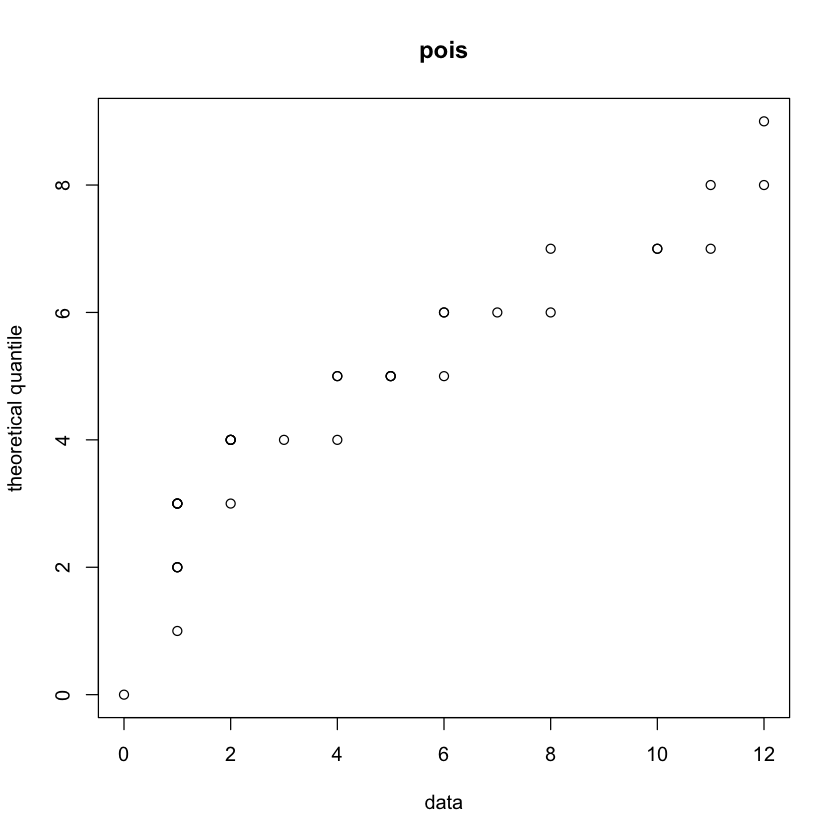

In [62]:
myqqplot(na.omit(total_data$n), 'pois')

# Inference
1. As per our expectation, there is a lot of variation in the Q-Q Plot and the data does not indeed fit very well into the poisson distribution. Still, given a total of 153 hurricanes distributed over a period of 168 years (not a lot of data for making accurate predictions) poisson seems like a decent fit. 
2. We can not say too much about the occurences of these events just based on the history of occurences. We will need to take more information into account - like the weather patterns, Rising Average Temperatures, Rising ocean levels due to glacier melting etc.
3. Still we can say 2 things with certainity:
    i) The number of hurricanes strikes per year has consitently gone up. (Depicted in the frequency plot below) 
    ii) Majority of occurences, occur during the fall season (August - October) and a deeper analysis of weather patterns during this period can lead to better predictions.


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

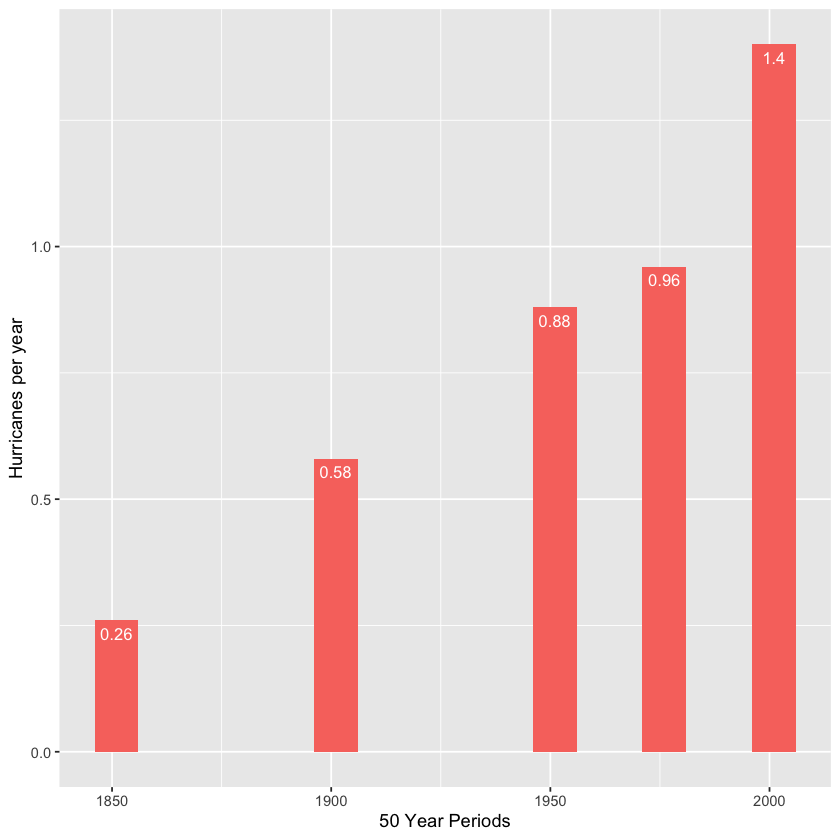

In [63]:
names(cat4_freq) <- c("period", "number", "number_per_year")
cat4_freq$period_50 <- as.numeric(gsub("([0-9]+).*", "\\1", cat4_freq$period))
# head(cat4_freq)
plot <- ggplot(data=cat4_freq, aes(x=period_50, y=number_per_year), color="#F8766D") +
    xlab("50 Year Periods") +
    ylab("Hurricanes per year") +    
    geom_histogram(stat="identity", fill="#F8766D", width=10, ) + 
    geom_text(aes(label=number_per_year), vjust=1.6, color="white", size=3.5)
plot

Lets Look at one of the reasons for this increasing hurricane activity

# Atlantic Mutlidecedal Oscillation (AMO)

It is a phenomenon occuring in majority of the Northern Atlantic, where in there exists phases of alternating warm and cool ocean waters fluctuating every 70 years. 
During the positive(warm) phase, there is higher than average Sea Surface Temperature(SST) in the Northern Atlantic region and cooler SST in the southern Atlantic region. This leads to an increase in hurricane activity, as warmer waters provide more energy for developing storms leading to more powerful hurricanes.

